# Kd Confidence Interval

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import t as tDist
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

## Load Data

In [2]:
folderName = "/home/malkusch/PowerFolders/Met-HMM/modeling/Data/met-Kd-fcs/"
date = (120908, 120912, 121024, 140716)
i = 0
fileName = str('%sFCS_Model_%i.csv' %(folderName, date[i]))
df_raw = pd.read_csv(filepath_or_buffer = fileName, index_col = 0)
print('Read data from %s' %(fileName))
df_raw['experiment'] = date[i] 
for i in range(1,len(date),1):
    fileName = str('%sFCS_Model_%i.csv' %(folderName, date[i]))
    df_temp = pd.read_csv(filepath_or_buffer = fileName, index_col = 0)
    print('Read data from %s' %(fileName))
    df_temp['experiment'] = date[i]
    df_raw = df_raw.append(df_temp)
    
df_raw.index = range(df_raw.shape[0])
df_raw = df_raw[['experiment', 'Kd', 'Ka', 'n', 'tauLigand', 'tauComplex', 'fitSuccess', 'logL', 'BIC', 'AIC', 'AICc', 'rmse']]
df_raw

Read data from /home/malkusch/PowerFolders/Met-HMM/modeling/Data/met-Kd-fcs/FCS_Model_120908.csv
Read data from /home/malkusch/PowerFolders/Met-HMM/modeling/Data/met-Kd-fcs/FCS_Model_120912.csv
Read data from /home/malkusch/PowerFolders/Met-HMM/modeling/Data/met-Kd-fcs/FCS_Model_121024.csv
Read data from /home/malkusch/PowerFolders/Met-HMM/modeling/Data/met-Kd-fcs/FCS_Model_140716.csv


,experiment,Kd,Ka,n,tauLigand,tauComplex,fitSuccess,logL,BIC,AIC,AICc,rmse
0,120908,4.298223,4.298223,1,1.64,3.897949,True,10.796526,-16.623239,-17.593053,-16.259719,0.098380
1,120908,5.233679,5.233679,1,1.64,3.934945,True,8.116483,-11.263152,-12.232965,-10.899632,0.118935
2,120908,5.186762,5.186762,1,1.64,3.969429,True,8.887982,-12.806150,-13.775963,-12.442630,0.113400
3,120908,5.189958,5.189958,1,1.64,3.945516,True,5.802031,-6.634250,-7.604063,-6.270730,0.134175
4,120908,5.007850,5.007850,1,1.64,3.935488,True,6.857668,-8.745523,-9.715337,-8.382003,0.127450
...,...,...,...,...,...,...,...,...,...,...,...,...
395,140716,2.303181,2.303181,1,2.48,3.866574,True,-3.151410,10.907990,10.302820,12.017105,0.184325
396,140716,2.640471,2.640471,1,2.48,3.900033,True,2.990762,-1.376354,-1.981524,-0.267239,0.147280
397,140716,2.533185,2.533185,1,2.48,3.761532,True,0.571374,3.462422,2.857252,4.571538,0.162881
398,140716,2.416162,2.416162,1,2.48,3.711396,True,0.579398,3.446374,2.841203,4.555489,0.162832


## Filter Data

In [3]:
i = -1
if(i!=-1):
    df_raw = df_raw[df_raw['experiment'] == date[i]]
    print('Analysis of experiment %i' %(date[i]))
else:
    print('Analysis of complete data')

Analysis of complete data


## Data statistics

In [4]:
df_raw.describe()

,experiment,Kd,Ka,n,tauLigand,tauComplex,logL,BIC,AIC,AICc,rmse
count,400.000000,400.000000,400.000000,400.0,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,125890.000000,3.876895,3.876895,1.0,1.98750,4.113425,2.286716,0.214060,-0.573432,0.950377,0.151718
std,8570.641735,0.978178,0.978178,0.0,0.34506,0.298618,6.035868,11.944060,12.071736,12.206613,0.034230
min,120908.000000,1.505998,1.505998,1.0,1.64000,3.680976,-19.711531,-19.800890,-20.770703,-19.437370,0.083849
25%,120911.000000,3.091930,3.091930,1.0,1.67750,3.918667,-1.862708,-8.764945,-9.734758,-8.384901,0.126804
50%,120968.000000,4.103405,4.103405,1.0,1.91500,4.017846,3.861469,-2.995108,-3.722938,-2.262245,0.143947
75%,125947.000000,4.734730,4.734730,1.0,2.22500,4.216607,6.867379,8.330586,7.725416,9.439702,0.177195
max,140716.000000,5.669789,5.669789,1.0,2.48000,4.705249,12.385351,44.028232,43.423061,45.137347,0.259029


## Test For Normality

In [5]:
mean,std=norm.fit(df_raw['Kd'])
print('Expectation Value: %.3f' %mean)
print('Standard deviation: %.3f' %std)

Expectation Value: 3.877
Standard deviation: 0.977


### qqPlot

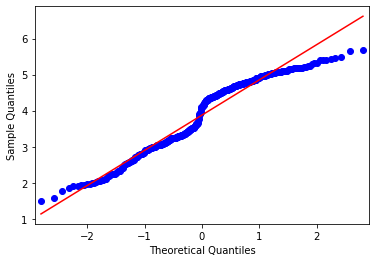

In [6]:
qqplot(df_raw['Kd'], line='s')
plt.show()

### Shapiro-Wilk Test

In [7]:
stat, p = shapiro(df_raw['Kd'])
print('Statistics=%.3f, p=%.3e' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.944, p=3.758e-11
Sample does not look Gaussian (reject H0)


### D’Agostino’s K^2 Test

In [8]:
stat, p = normaltest(df_raw['Kd'])
print('Statistics=%.3f, p=%.3e' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=119.218, p=1.295e-26
Sample does not look Gaussian (reject H0)


### Anderson-Darling Test

In [9]:
result = anderson(df_raw['Kd'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 8.951
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.909, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)


## 95% Confidence Interval

In [10]:
ciMin, ciMax = tDist.interval(0.95, df_raw['Kd'].shape[0]-1, loc=mean, scale=std)
#print(mean - 1.960*std)
#print(mean + 1.960*std)
print('95 percent of all values are in [%.3f, %.3f]' %(ciMin,ciMax))


95 percent of all values are in [1.956, 5.798]


## Plot Result

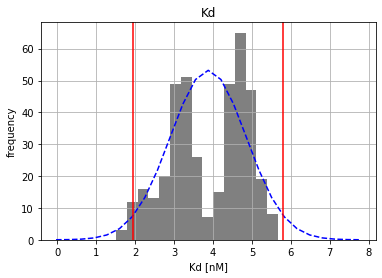

In [11]:
x = np.linspace(mean - 4*std, mean + 4*std, 25)
y = norm.pdf(x, mean, std)
y = df_raw.shape[0] * y/sum(y)
df_raw.hist('Kd', bins = 15, color = 'grey')
plt.plot(x,y, '--b')
plt.axvline(x=ciMin, color= 'r')
plt.axvline(x=ciMax, color = 'r')
plt.xlabel(xlabel = 'Kd [nM]')
plt.ylabel(ylabel= 'frequency')
plt.show()